In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#Importing the dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing = pd.read_csv('/content/drive/MyDrive/company assignment/squibix/assignment/housing.csv', header=None, delimiter=r"\s+", names=column_names)
print(housing.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
min_value = housing.min()
max_value = housing.max()
print(min_value)
print(max_value)

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
MEDV         5.00000
dtype: float64
CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
MEDV        50.0000
dtype: float64


In [ ]:
#min max normalization
minmax_housing = (housing - min_value) / (max_value - min_value)
print(minmax_housing.head(5))

       CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0  0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1  0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2  0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3  0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4  0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   

        RAD       TAX   PTRATIO         B     LSTAT      MEDV  
0  0.000000  0.208015  0.287234  1.000000  0.089680  0.422222  
1  0.043478  0.104962  0.553191  1.000000  0.204470  0.368889  
2  0.043478  0.104962  0.553191  0.989737  0.063466  0.660000  
3  0.086957  0.066794  0.648936  0.994276  0.033389  0.631111  
4  0.086957  0.066794  0.648936  1.000000  0.099338  0.693333  


In [ ]:
#Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(minmax_housing.drop('MEDV', axis=1), minmax_housing['MEDV'], test_size=0.2, random_state=42)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [ ]:
#model creation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.011995614555542483
R-squared: 0.6687594935356318


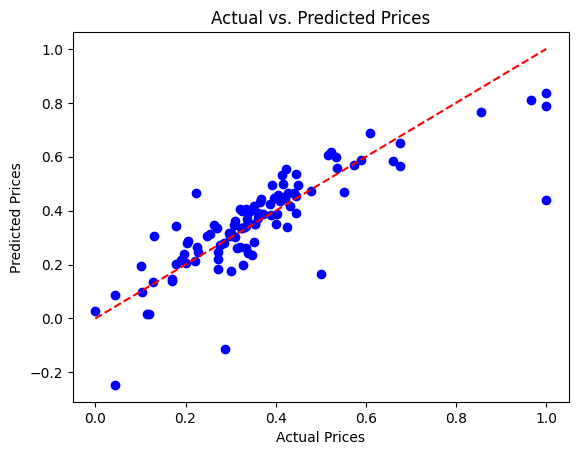

In [ ]:
# Create a scatter plot
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

In [ ]:
#visualizing the coefficients
model.coef_

array([-0.22352382,  0.06691214,  0.02447969,  0.0618764 , -0.18578844,
        0.51480624, -0.01358615, -0.3538229 ,  0.13413075, -0.12397591,
       -0.19122864,  0.10885094, -0.40956952])


### Interpretation of Coefficients
- **Positive Coefficient**: A positive value means that as the feature increases, the housing price is expected to increase, assuming all other features remain constant.
- **Negative Coefficient**: A negative value means that as the feature increases, the housing price is expected to decrease, assuming all other features remain constant.

### Feature Impact
Given coefficients and the feature names:

1. **CRIM (-0.2235)**: Higher crime rates are associated with lower housing prices.
2. **ZN (0.0669)**: Higher proportions of residential land zoned for large lots are associated with slightly higher housing prices.
3. **INDUS (0.0245)**: Higher proportions of non-retail business acres per town are associated with slightly higher housing prices.
4. **CHAS (0.0619)**: Being near the Charles River has a positive but small impact on housing prices.
5. **NOX (-0.1858)**: Higher nitric oxide concentration (pollution) is associated with lower housing prices.
6. **RM (0.5148)**: More rooms per dwelling are strongly associated with higher housing prices.
7. **AGE (-0.0136)**: Older homes (proportion of owner-occupied units built before 1940) have a slight negative impact on housing prices.
8. **DIS (-0.3538)**: Greater distances to employment centers are associated with lower housing prices.
9. **RAD (0.1341)**: Higher accessibility to radial highways is associated with higher housing prices.
10. **TAX (-0.1240)**: Higher property tax rates are associated with lower housing prices.
11. **PTRATIO (-0.1912)**: Higher pupil-teacher ratios in schools are associated with lower housing prices.
12. **B (0.1089)**: Higher proportions of the population that are Black (B) are associated with higher housing prices.
13. **LSTAT (-0.4096)**: Higher percentages of lower status of the population are strongly associated with lower housing prices.

### Summary
- **Strong Positive Impact**: `RM` (number of rooms), `RAD` (accessibility to highways)
- **Strong Negative Impact**: `LSTAT` (lower status population), `DIS` (distance to employment centers), `NOX` (pollution)

These coefficients help us understand which features are most influential in predicting housing prices.